## EDA

In [7]:
import numpy as np
import pandas as pd

df=pd.read_csv("dataset/yield_df.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

datacorr=df.copy()
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


### 1. Heatmap


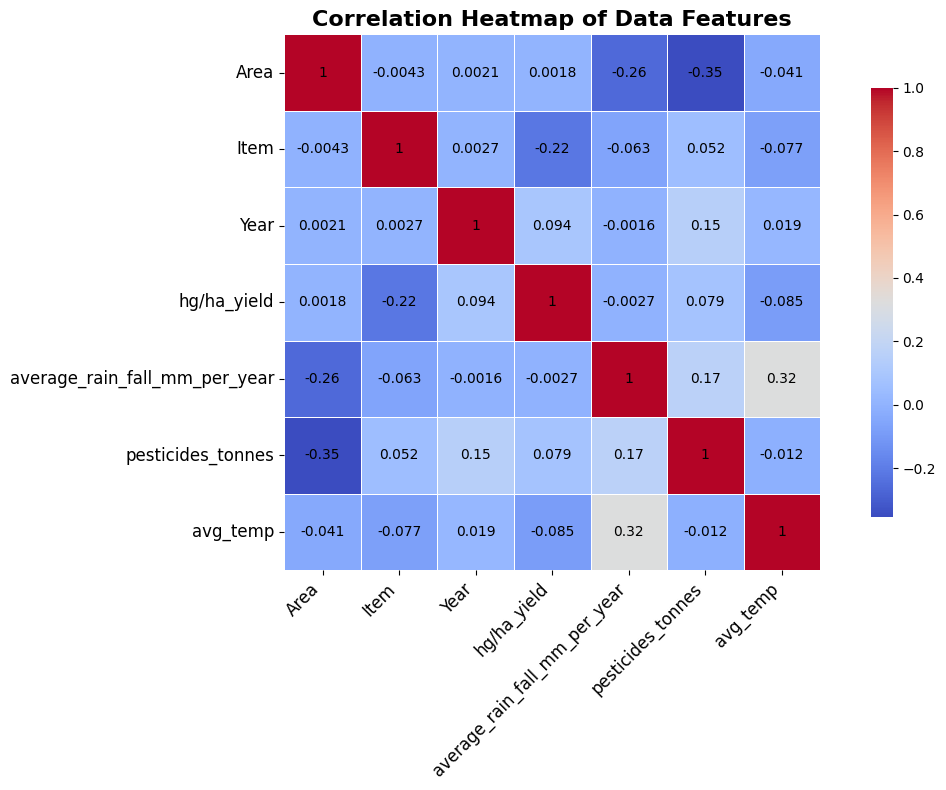

In [10]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Select all categorical columns in the DataFrame
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(datacorr.corr(), 
            annot=True,           # Show correlation values in the cells
            cmap='coolwarm',          # Set color palette
            linewidths=0.5,       
            square=True,        
            cbar_kws={"shrink": 0.8}, # Adjust color bar size
            annot_kws={"size": 10, "color": "black"},  # Customize annotation size and color
                 
            )

plt.title('Correlation Heatmap of Data Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  

# Display the heatmap
plt.show()


## 2. Histogram


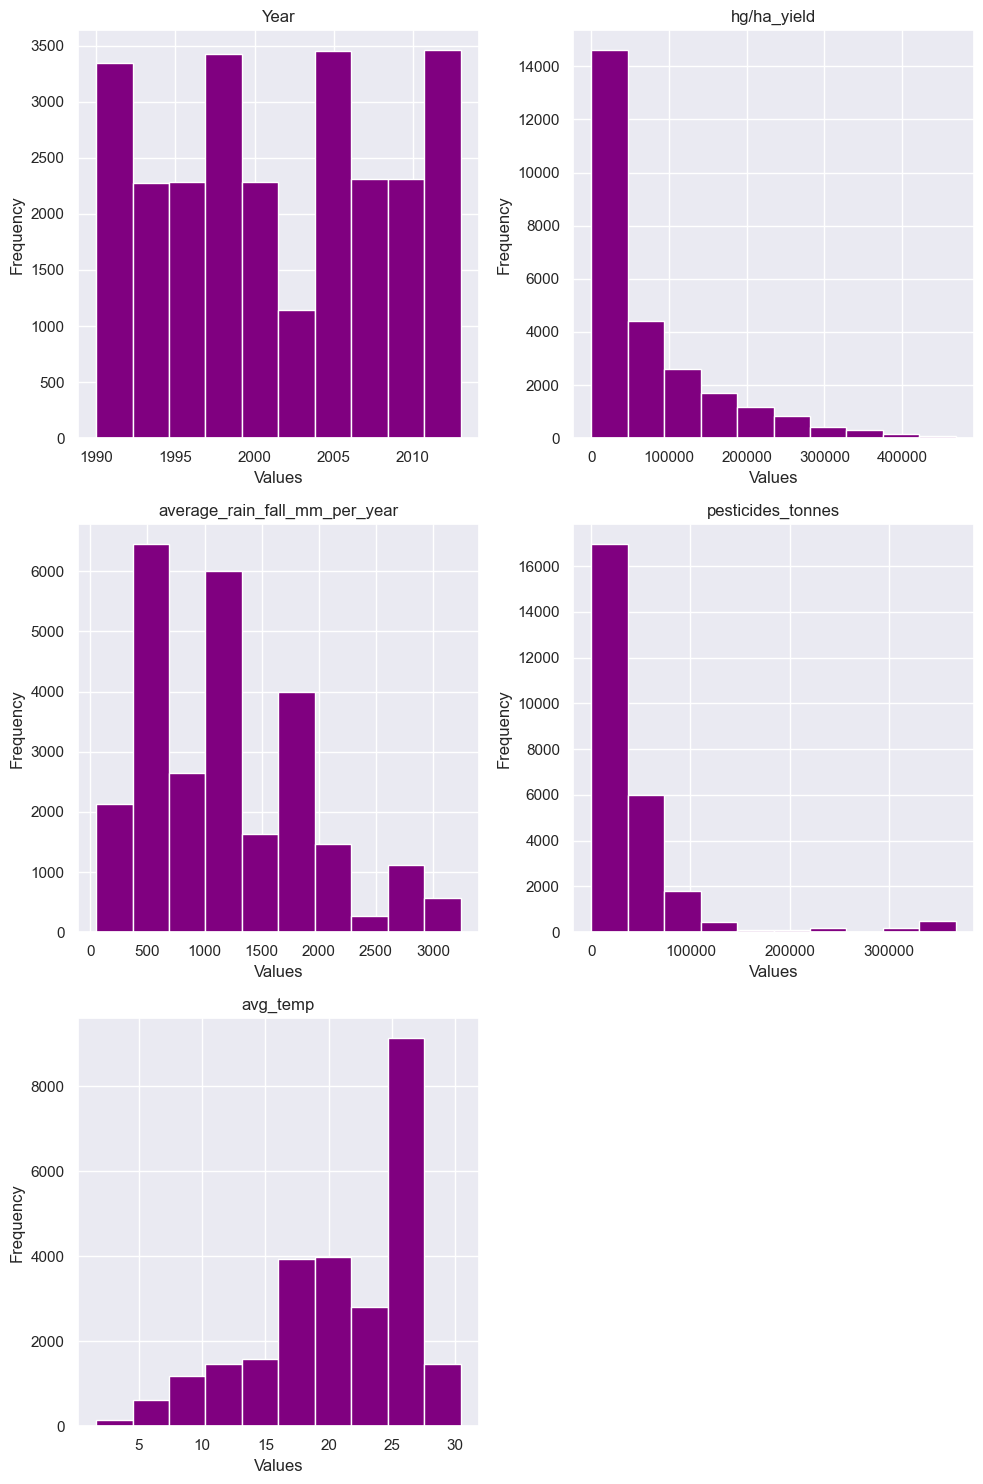

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn palette (this won't directly affect the color of df.hist)
sns.set(palette='viridis')

# Create histograms with the same color for all
axes = df.hist(figsize=(10, 15), color='purple')

# Iterate through the axes to set labels for each subplot
for ax in axes.flatten():
    ax.set_xlabel('Values', fontsize=12)  # X-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


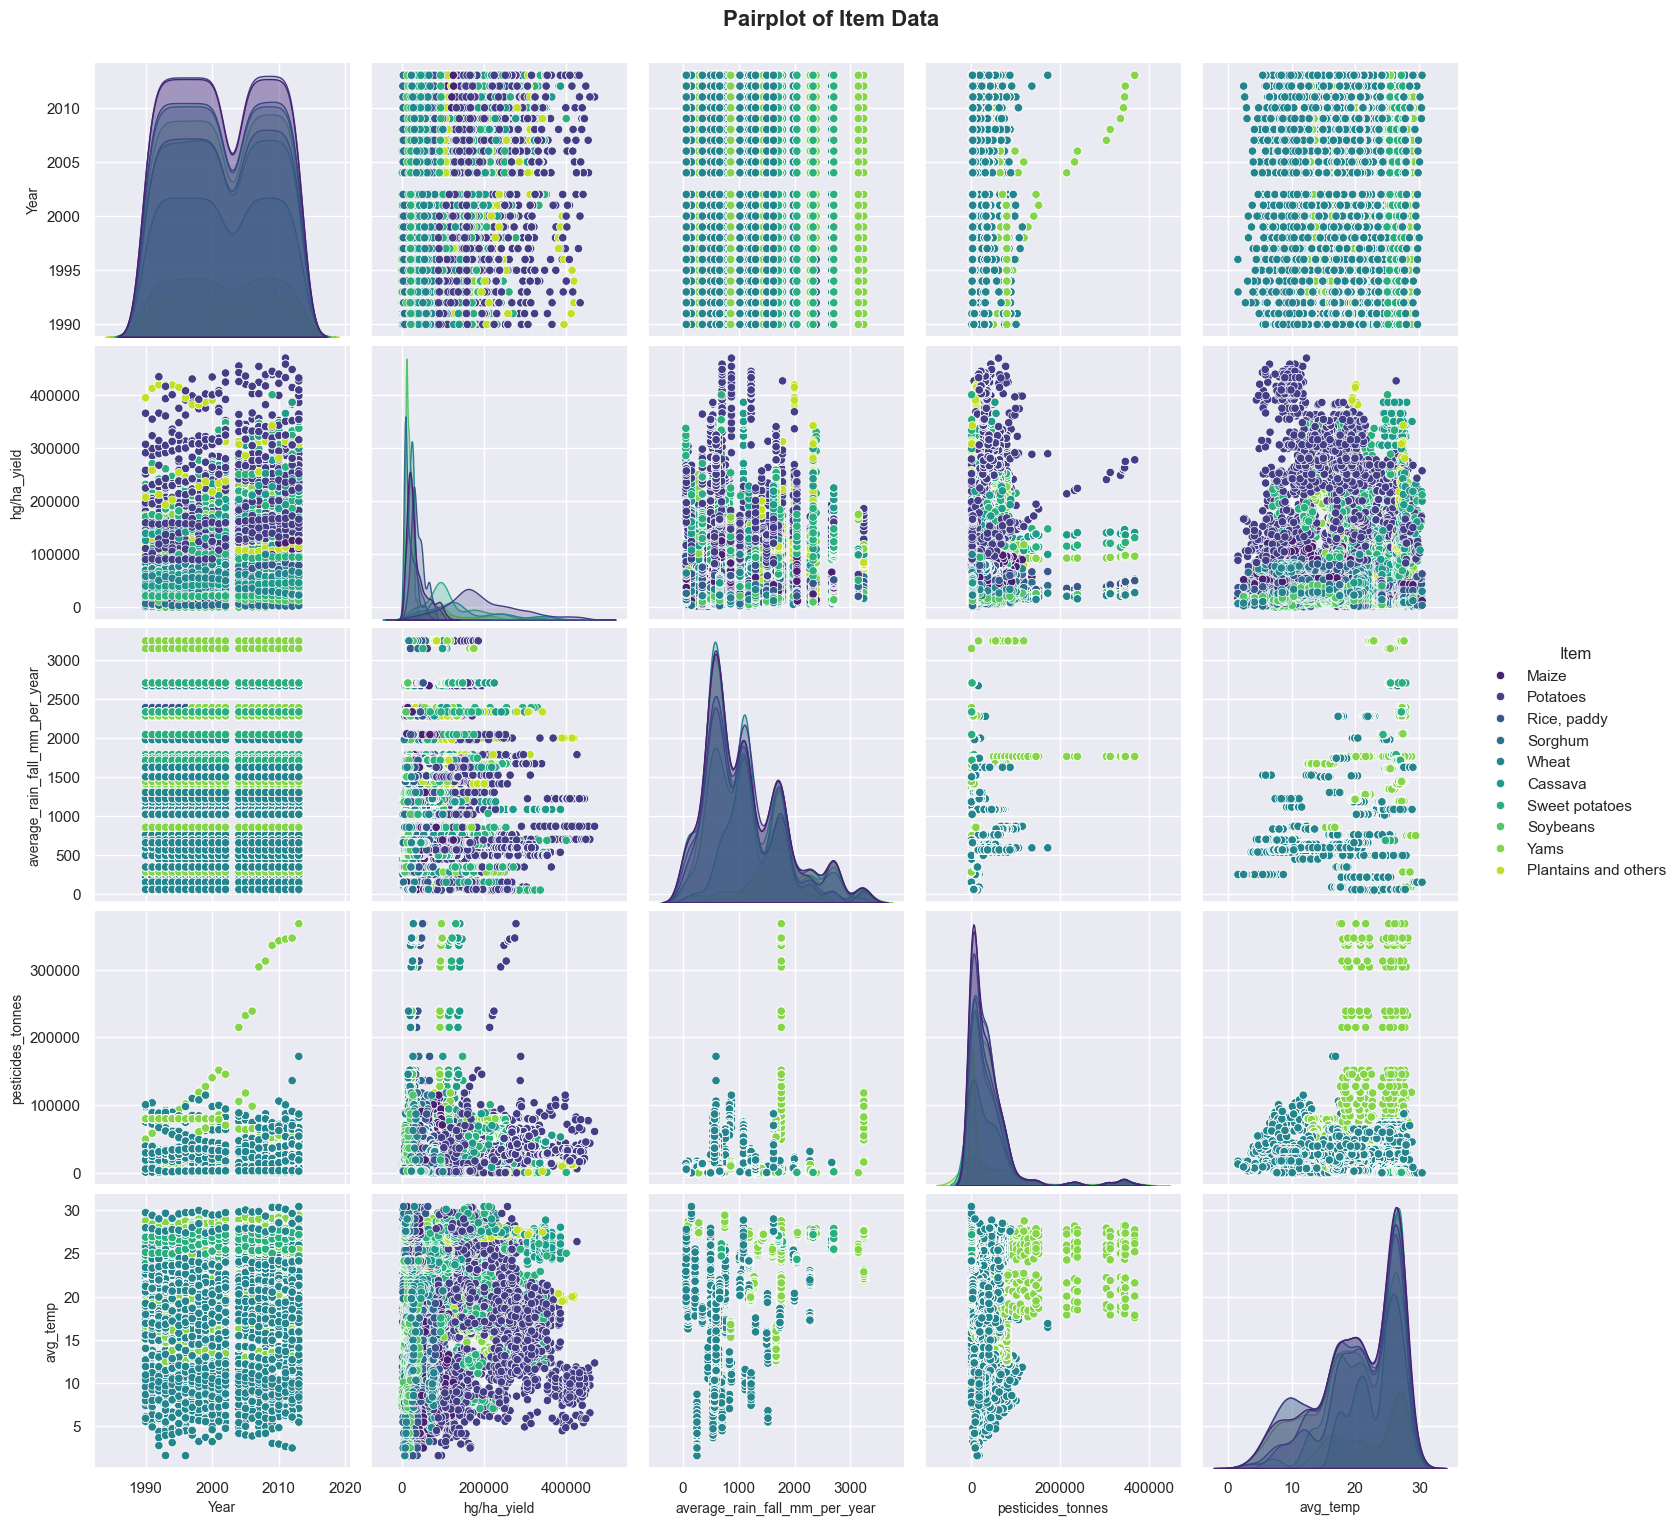

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with hue, kind, and palette, specifying a larger height
pairplot = sns.pairplot(data=df, hue='Item', kind='scatter', palette='viridis', height=3)

# Iterate through the axes to set labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)  # Set x-axis label
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)  # Set y-axis label

# Set the title for the entire pairplot
plt.suptitle('Pairplot of Item Data', fontsize=16, fontweight='bold', y=1.02)  # y=1.02 to adjust title position

# Show the plot
plt.show()


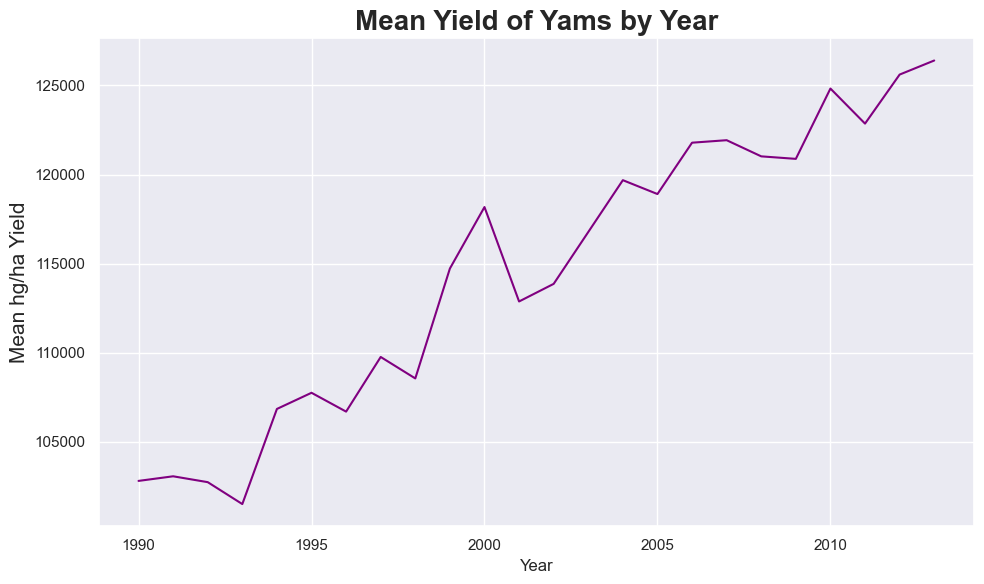

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for 'Yams'
df2 = df[df['Item'] == 'Yams']

# Group by 'Year' and plot the mean of 'hg/ha_yield'
ax = df2.groupby('Year')['hg/ha_yield'].mean().plot(color='purple', figsize=(10, 6))

# Set the y-axis label
ax.set_ylabel('Mean hg/ha Yield', fontsize=15)

# Set the title of the plot (optional)
ax.set_title('Mean Yield of Yams by Year', fontsize=20, fontweight='bold')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
